<a href="https://colab.research.google.com/github/ClaraMikaelly-ifpi/ClaraMikaelly-ifpi/blob/main/trabalhoFinalRedeNeural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Aluna: Clara Mikaelly Veras da Costa

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,  ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [ ]:
import zipfile

zip_path = '/content/drive/MyDrive/trabalhoFinal/dataset.zip'
extract_path = '/content/drive/MyDrive/trabalhoFinal/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset unzipped successfully.")


Dataset unzipped successfully.


In [ ]:
import os
print(os.listdir('/content/drive/MyDrive/trabalhoFinal/'))


train_dir = '/content/drive/MyDrive/trabalhoFinal/dataset/'
test_dir = '/content/drive/MyDrive/trabalhoFinal/dataset/'

['dataset.zip', 'dataset']


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2),
    fill_mode='nearest'
)


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size = (64, 64),
  batch_size = 16,
  class_mode='binary',
  shuffle = True
)

test_generator = test_datagen.flow_from_directory(
  test_dir,
  target_size = (64, 64),
  batch_size = 16,
  class_mode='binary',
  shuffle = False
)

from sklearn.utils.class_weight import compute_class_weight

classes = np.array([0, 1])
weights = compute_class_weight(class_weight='balanced', classes=classes, y=train_generator.classes)
class_weights = dict(zip(classes, weights))
print("Class weights: ",class_weights)


Found 192 images belonging to 2 classes.
Found 192 images belonging to 2 classes.
Class weights:  {np.int64(0): np.float64(1.2972972972972974), np.int64(1): np.float64(0.8135593220338984)}


In [ ]:
print(os.listdir('/content/drive/MyDrive/trabalhoFinal/dataset/'))

['grao_quebrado', 'graos_inteiros']


In [ ]:
model = Sequential([
    Input(shape=(64, 64, 3)),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compilação
model.compile(
    optimizer = Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

# Treinamento
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator,
    callbacks=[early_stop, reduce_lr]
)

# Avaliação
loss, acc = model.evaluate(test_generator)
print(f"Acurácia no conjunto de validação: {acc:.4f}")

# Resumo da arquitetura
model.summary()

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 683ms/step - accuracy: 0.5495 - loss: 1.1134 - val_accuracy: 0.6406 - val_loss: 0.6894 - learning_rate: 1.0000e-04
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 386ms/step - accuracy: 0.5787 - loss: 0.8842 - val_accuracy: 0.7656 - val_loss: 0.6872 - learning_rate: 1.0000e-04
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 432ms/step - accuracy: 0.6661 - loss: 0.7731 - val_accuracy: 0.7917 - val_loss: 0.6860 - learning_rate: 1.0000e-04
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 404ms/step - accuracy: 0.5951 - loss: 0.7291 - val_accuracy: 0.7812 - val_loss: 0.6841 - learning_rate: 1.0000e-04
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 560ms/step - accuracy: 0.5838 - loss: 0.7095 - val_accuracy: 0.8854 - val_loss: 0.6799 - learning_rate: 1.0000e-04
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 399ms/step - accuracy: 0.6674 - loss: 0.6378 - val_accuracy: 0.8125 - val_loss: 0.6792 - learning_rate: 1.0000e-04
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 392ms/step - accuracy

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_61 (Conv2D)              │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_60 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_75 (Dropout)            │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_61 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_76 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_62 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_77 (Dropout)            │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_64 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_63 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_78 (Dropout)            │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_21 (Flatten)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_79 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,312,773 (16.45 MB)

 Trainable params: 1,437,569 (5.48 MB)

 Non-trainable params: 64 (256.00 B)

 Optimizer params: 2,875,140 (10.97 MB)

In [ ]:
# avaliacao
loss, acc = model.evaluate(test_generator)
print(f"Acurácia no conjunto de teste: {acc:.4f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 0.9755 - loss: 0.2540
Acurácia no conjunto de teste: 0.9531


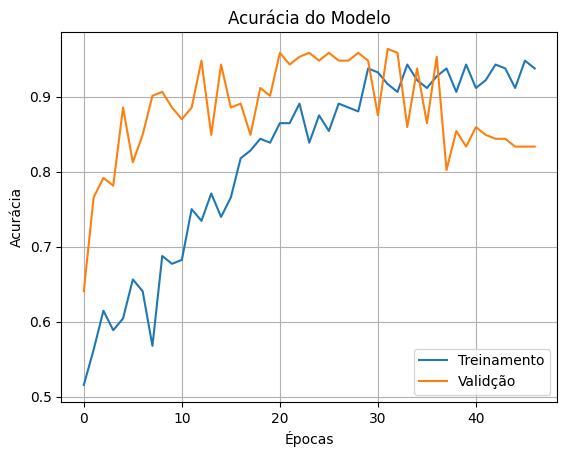

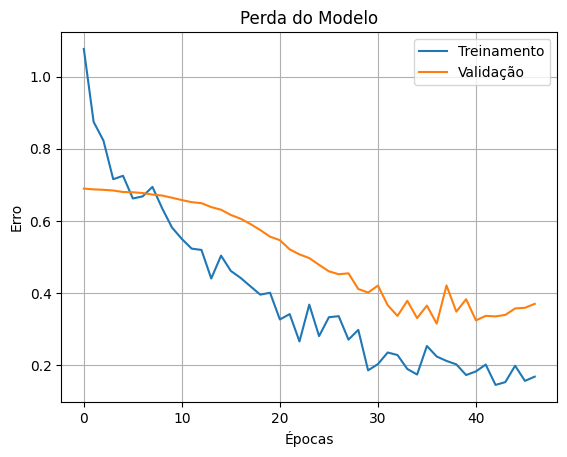

In [ ]:
#graficos

plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validção')
plt.title('Acurácia do Modelo')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda do Modelo')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.legend()
plt.grid(True)
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step
Matriz de Confusão:


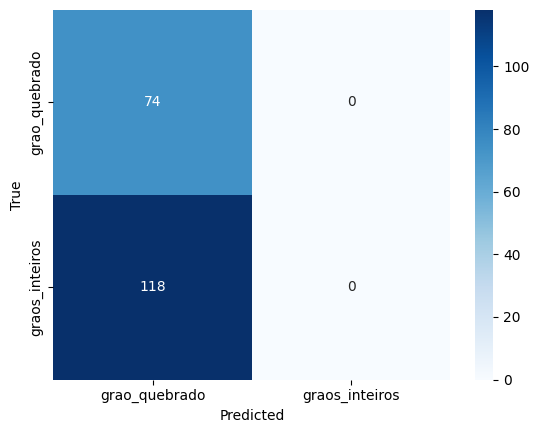


Relatório de Classificação:
                precision    recall  f1-score   support

 grao_quebrado       0.39      1.00      0.56        74
graos_inteiros       0.00      0.00      0.00       118

      accuracy                           0.39       192
     macro avg       0.19      0.50      0.28       192
  weighted avg       0.15      0.39      0.21       192



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#Avaliação detalhada
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Import numpy

y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=1) # Get predicted class indices

print("Matriz de Confusão:")
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels = train_generator.class_indices, yticklabels = train_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("\nRelatório de Classificação:")
print(classification_report(y_true, y_pred, target_names=list(train_generator.class_indices.keys()))) # Corrected target_names

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step


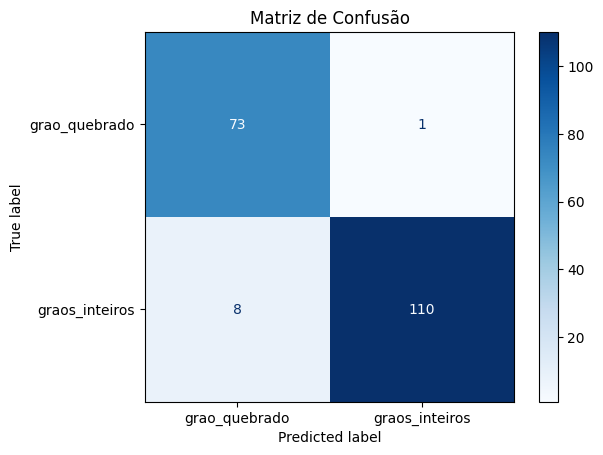


Relatório de Classificação:
                precision    recall  f1-score   support

 grao_quebrado       0.90      0.99      0.94        74
graos_inteiros       0.99      0.93      0.96       118

      accuracy                           0.95       192
     macro avg       0.95      0.96      0.95       192
  weighted avg       0.96      0.95      0.95       192



In [ ]:
# Gera previsões (valores entre 0 e 1)
pred_probs = model.predict(test_generator, verbose=1)

# Converte para 0 ou 1 usando limiar de 0.5
y_pred = (pred_probs > 0.5).astype(int).reshape(-1)

# Verdadeiros rótulos
y_true = test_generator.classes

# Gera matriz de confusão
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(test_generator.class_indices.keys()))
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão')
plt.show()

# Resumo de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_true, y_pred, target_names=list(test_generator.class_indices.keys())))
